<a href="https://colab.research.google.com/github/umrsid/exploring-cryptocurrency-market/blob/main/Exploring_the_cryptocurrency_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing libraries***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **import the data, Discard the cryptocurrencies without a market capitalization**

In [ ]:
df= pd.read_csv("coinmarketcap_06122017.csv")
market_cap_raw = df[['id','market_cap_usd']]
cap = market_cap_raw[market_cap_raw["market_cap_usd"] > 0]

### ***How big is Bitcoin compared with the rest of the cryptocurrencies?***

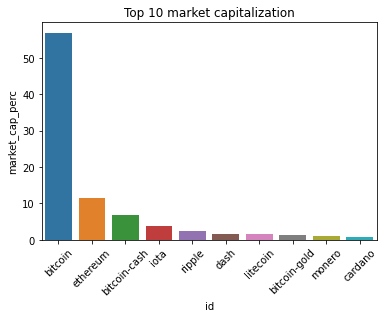

In [ ]:
# Selecting the first 10 rows and setting the index
cap10 = cap[:10].set_index('id')

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)

sns.barplot(x="id",y="market_cap_perc",data=cap10.reset_index())
plt.title('Top 10 market capitalization')
plt.xticks(rotation=45)
plt.show()


# ***Making the plot more informative with log scale***

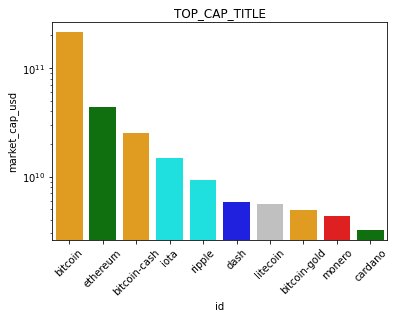

In [ ]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

sns.barplot(y='market_cap_usd',x="id",data=cap10.reset_index(), palette = COLORS)
plt.title("TOP_CAP_TITLE")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

# ***Volatility in cryptocurrencies***

In [ ]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = df[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


# ***ploting the top 10 winners gainers and top 10 losers in market capitalization in 24h***

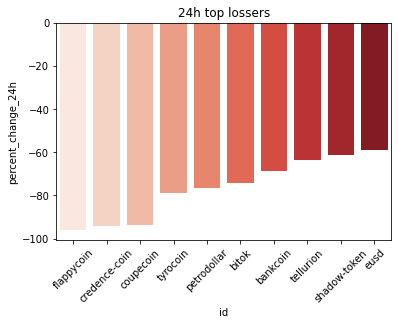

In [ ]:
sns.barplot(x="id",y="percent_change_24h",data=volatility[:10].reset_index(),palette= "Reds")
plt.xticks(rotation=45)
plt.title("24h top lossers")
plt.show()

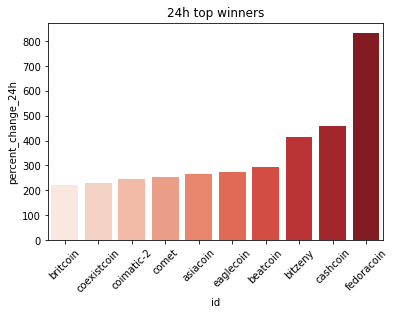

In [ ]:
sns.barplot(x="id",y="percent_change_24h",data=volatility.reset_index().tail(10),palette= "Reds")
plt.xticks(rotation=45)
plt.title("24h top winners")
plt.show()

# ***ploting the top 10 biggest winners and top 10 losers in market capitalization in 7d***

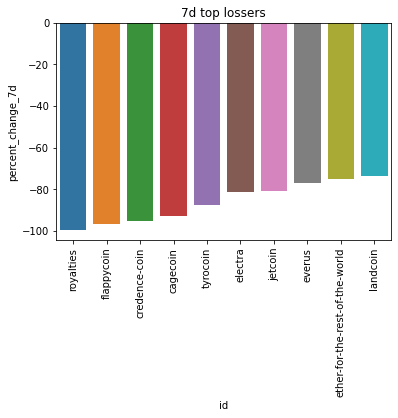

In [ ]:
volatility7d=volatility.sort_values("percent_change_7d")
plt.title("7d top lossers")
sns.barplot(y='percent_change_7d',x="id",data=volatility7d.reset_index()[:10])
plt.xticks(rotation=90)
plt.show()

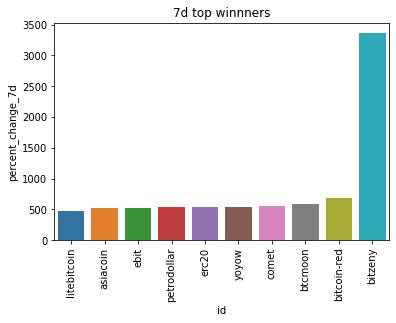

In [ ]:
# plotting 7d change
sns.barplot(y='percent_change_7d',x="id",data=volatility7d.reset_index().tail(10))
plt.title("7d top winnners")
plt.xticks(rotation=90)
plt.show()

# ***COINS with larger market cap***

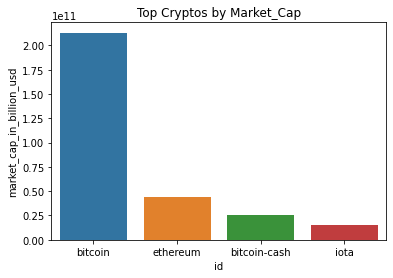

In [ ]:
# selecting those which have market cap bigger than 10 billion 
largecaps = cap[cap["market_cap_usd"] > 1E+10]

# print largecaps
sns.barplot(x="id",y="market_cap_usd",data=largecaps)
plt.title("Top Cryptos by Market_Cap")
plt.ylabel("market_cap_in_billion_usd")
plt.show()

# ***`Most coins are small`***

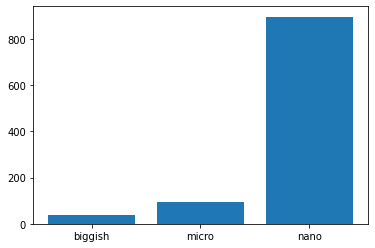

In [ ]:
# Making a function for counting market caps
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels
LABELS = ["biggish", "micro", "nano"]

# for big cryptos
biggish = capcount("market_cap_usd > 3E+8")

# for micro
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting
plt.bar(range(len(values)), values, tick_label=LABELS)
plt.show()
